In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

from scipy.stats import spearmanr,pearsonr,mannwhitneyu
from statsmodels.stats.multitest import multipletests
plt.rcParams['font.family'] = 'Arial'
from cbtk.stats import run_pca

In [2]:
df = pd.read_csv("../data/black-sea/metagenomics/black-sea-metadata.csv",index_col=0)

In [3]:
# load MO pterin gene families
mwpterins = pd.read_csv("../data/pyranopterin.geneTable.csv")

mo_ko = mwpterins[mwpterins['Pterin'].apply(lambda x: 'Mo' in str(x))]['KO (pterin domain)'].dropna().unique().tolist()
w_ko = mwpterins[mwpterins['Pterin'].apply(lambda x: 'W' in str(x))]['KO (pterin domain)'].dropna().unique().tolist()


pterin_kos = mwpterins["KO (pterin domain)"].dropna().unique().tolist()
pterin_kos = [x.split(",") for x in pterin_kos]
pterin_kos = list(set([item for sublist in pterin_kos for item in sublist]))


mo_ko = [x.split(",") for x in mo_ko]
mo_ko = list(set([item for sublist in mo_ko for item in sublist]))


w_ko = [x.split(",") for x in w_ko]
w_ko = list(set([item for sublist in w_ko for item in sublist]))


In [4]:
KO = pd.read_csv("../data/black-sea/metagenomics/blackSeaMAG.keggOrthogroupCopyNumbers.csv",index_col=0).T.fillna(0)
KO["total"] = KO.sum(axis=1)
KO["c_W"] = KO[[x for x in list(KO) if x in w_ko]].sum(axis=1)
KO["c_Mo"] = KO[[x for x in list(KO) if x in mo_ko]].sum(axis=1)
rel_abun = pd.read_csv("../data/black-sea/metagenomics/blackSea.MAGfraction.04Feb2023.csv",index_col=0)

In [5]:
df_all = KO.join(rel_abun)
C = df_all[["c_W","c_Mo"]].values
X = df_all[list(rel_abun)].T.values
ko_abundances = pd.DataFrame(np.dot(X,C),columns=["c_W","c_Mo"],index = list(rel_abun))

In [6]:
#df["c_W"] = df[[x for x in list(df) if x in w_ko]].sum(axis=1)
#df["c_Mo"] = df[[x for x in list(df) if x in mo_ko]].sum(axis=1)
dfp = df[["depth_m"]].join(ko_abundances)

cmap = sns.color_palette("Set2")

plt.figure(figsize=(2,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
gene = "c_W"
sns.scatterplot(x=gene,data=df,y="depth_m",color=cmap[1])
#sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[1])
plt.plot(df.sort_values("depth_m")[gene],dfp.sort_values("depth_m")["depth_m"],color=cmap[1])

gene = "c_Mo"

sns.scatterplot(x=gene,data=df,y="depth_m",color=cmap[0])
#sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[0])
plt.plot(df.sort_values("depth_m")[gene],dfp.sort_values("depth_m")["depth_m"],color=cmap[0])


plt.xlabel("relative copy of number of \n pyranopterin gene families")


#plt.ylabel("$aor$ abundance")
#plt.xlabel("depth (m)")

#ax2 = plt.twinx()
#feature = "O2_mmolperkg"
#feature = "H2S mM"
#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)
#sns.scatterplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)

#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#plt.ylim([8,2500])
plt.ylim([45,2500])

plt.gca().invert_yaxis()

plt.yscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
#plt.label("depth (m)")
plt.ylabel("depth (m)")


ValueError: Could not interpret value `c_W` for parameter `x`

<Figure size 200x400 with 0 Axes>

In [63]:
list(df)[-10:]

['size_frac',
 'SRA Study',
 'Temp',
 'tot_depth_water_col',
 'water_filtered',
 'depth_m',
 'H2S mM',
 'O2_mmolperkg',
 'c_W',
 'c_Mo']

In [61]:
from pingouin import partial_corr

In [64]:
partial_corr(data=df,x = "O2_mmolperkg", y="c_Mo",covar=["H2S mM"])

,n,r,CI95%,p-val
pearson,15,-0.587112,"[-0.85, -0.08]",0.027286


In [65]:
partial_corr(data=df,x = "H2S mM", y="c_Mo",covar=["O2_mmolperkg"])

,n,r,CI95%,p-val
pearson,15,-0.4462,"[-0.79, 0.11]",0.109766


In [66]:
partial_corr(data=df,x = "O2_mmolperkg", y="c_W",covar=["H2S mM"])

,n,r,CI95%,p-val
pearson,15,-0.333367,"[-0.73, 0.24]",0.24412


In [67]:
partial_corr(data=df,x = "H2S mM", y="c_W",covar=["O2_mmolperkg"])

,n,r,CI95%,p-val
pearson,15,0.586159,"[0.08, 0.85]",0.0276


In [9]:
df[[x for x in list(df) if x[0] not in ["K","M","W"]]].to_csv("../data/blackSea.metadata.csv")

In [13]:
df["ratio (W/Mo)"] = np.log10(df["W_KOs"] / df["MO_KOs"])

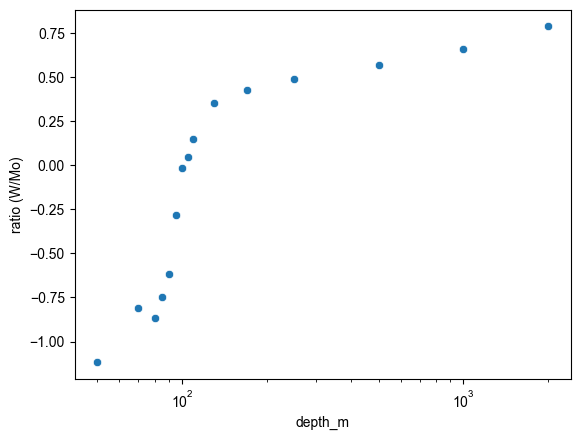

In [14]:
sns.scatterplot(x="depth_m",y="ratio (W/Mo)",data=df)
plt.xscale("log")


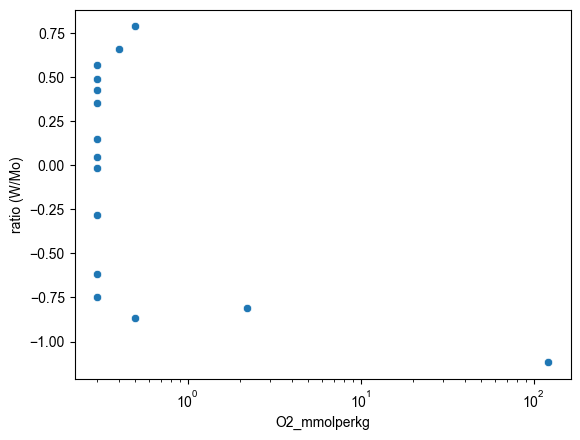

In [20]:
sns.scatterplot(x="O2_mmolperkg",y="ratio (W/Mo)",data=df)
plt.xscale("log")

In [23]:
#
l1 = "ratio (W/Mo)"
#l1 = "MO_KOs"

#l2 = "O2_mmolperkg"
#cov = "H2S mM"
l2 = "H2S mM"
cov = None
cov = "O2_mmolperkg"


pg.partial_corr(data=df, x=l1, y=l2, covar=cov)


,n,r,CI95%,p-val
pearson,15,0.684066,"[0.24, 0.89]",0.006973


In [9]:
#
#l1 = "W_KOs"
l1 = "MO_KOs"

l2 = "O2_mmolperkg"
cov = "H2S mM"
#cov = None
pg.partial_corr(data=df, x=l1, y=l2, covar=cov)


,n,r,CI95%,p-val
pearson,15,-0.618517,"[-0.87, -0.13]",0.018377


In [14]:
ko_list = [x for x in list(df) if "K"!=x[0]]

In [21]:
#df["H2S"]

In [11]:
ko_list = [x for x in list(df) if "K"==x[0]]

In [13]:
#ko_list

In [17]:
pdf = run_pca(df[ko_list])

In [20]:
l1 = list(pdf["pdf"])[0]
l2 = list(pdf["pdf"])[1]

<AxesSubplot:xlabel='PC1 (48.43%)', ylabel='PC2 (20.78%)'>

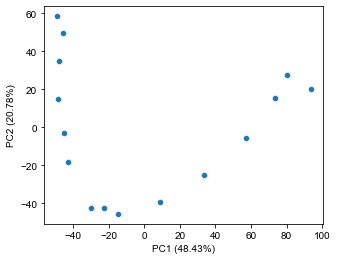

In [26]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=l1,y=l2,data=pdf["pdf"])

In [32]:
md = df[[x for x in list(df) if x not in ko_list]]

In [34]:
p = pdf["pdf"].join(md)

In [39]:
#list(p)

<AxesSubplot:xlabel='PC1 (48.43%)', ylabel='PC2 (20.78%)'>

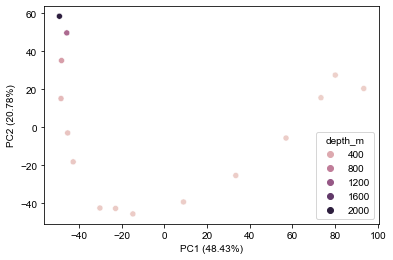

In [38]:
#sns.scatterplot(x=l1,y=l2,data=p,hue="depth_m")

In [147]:
cmap = sns.color_palette("Set2")
cmap

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [149]:
cmap1 = sns.color_palette("Set1")
cmap1

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [180]:
list(md)

['ammonium',
 'Assay Type',
 'AvgSpotLen',
 'Bases',
 'BioProject',
 'BioSample',
 'BioSampleModel',
 'Bytes',
 'Center Name',
 'Collection_Date',
 'Consent',
 'DATASTORE filetype',
 'DATASTORE provider',
 'DATASTORE region',
 'Depth',
 'diss_oxygen',
 'env_broad_scale',
 'env_local_scale',
 'env_medium',
 'Experiment',
 'geo_loc_name_country',
 'geo_loc_name_country_continent',
 'geo_loc_name',
 'hydrogen_sulfide',
 'Instrument',
 'Isolation_source',
 'Lat_Lon',
 'Library Name',
 'LibraryLayout',
 'LibrarySelection',
 'LibrarySource',
 'nitrate',
 'Nitrite',
 'Organism',
 'phosphate',
 'Platform',
 'potential_density',
 'ReleaseDate',
 'create_date',
 'version',
 'Salinity',
 'samp_collect_device',
 'samp_store_temp',
 'Sample Name',
 'size_frac',
 'SRA Study',
 'Temp',
 'tot_depth_water_col',
 'water_filtered',
 'depth_m',
 'H2S mM',
 'O2_mmolperkg']

In [26]:
df[["Nitrite"]]

,Nitrite
SRR12347140,0.001 mM
SRR12347133,0.013 mM
SRR12347143,0.001 mM
SRR12347136,0.014 mM
SRR12347135,0.012 mM
SRR12347132,0.001 mM
SRR12347138,0.042 mM
SRR12347134,0.016 mM
SRR12347146,0.077 mM
SRR12347139,0.024 mM


Text(0, 0.5, 'depth (m)')

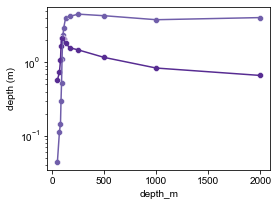

In [176]:
plt.figure(figsize=(4,3))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
gene = "K03738"
gene = "W_KOs"
sns.scatterplot(y=gene,data=df,x="depth_m",color=cmap[1])
sns.lineplot(y=gene,data=df,x="depth_m",color=cmap[1])

gene = "MO_KOs"
sns.scatterplot(y=gene,data=df,x="depth_m",color=cmap[0])
sns.lineplot(y=gene,data=df,x="depth_m",color=cmap[0])
plt.ylabel("relative copy of number of \n pyanopterin gene families")



#plt.ylabel("$aor$ abundance")
plt.ylabel("depth (m)")

#ax2 = plt.twinx()
#feature = "O2_mmolperkg"
#feature = "H2S mM"
#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)
#sns.scatterplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)

#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)


plt.xscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
plt.xlabel("depth (m)")
#plt.savefig("pterinEnzymes.BlackSea.MoVsW.04Feb2023.svg")

Text(0, 0.5, 'depth (m)')

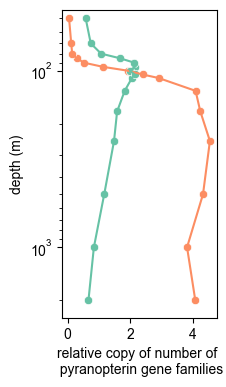

In [18]:
cmap = sns.color_palette("Set2")

plt.figure(figsize=(2,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
gene = "W_KOs"
sns.scatterplot(x=gene,data=df,y="depth_m",color=cmap[1])
#sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[1])
plt.plot(df.sort_values("depth_m")[gene],df.sort_values("depth_m")["depth_m"],color=cmap[1])

gene = "MO_KOs"

sns.scatterplot(x=gene,data=df,y="depth_m",color=cmap[0])
#sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[0])
plt.plot(df.sort_values("depth_m")[gene],df.sort_values("depth_m")["depth_m"],color=cmap[0])


plt.xlabel("relative copy of number of \n pyranopterin gene families")


#plt.ylabel("$aor$ abundance")
#plt.xlabel("depth (m)")

#ax2 = plt.twinx()
#feature = "O2_mmolperkg"
#feature = "H2S mM"
#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)
#sns.scatterplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)

#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#plt.ylim([8,2500])
plt.ylim([45,2500])

plt.gca().invert_yaxis()

plt.yscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
#plt.label("depth (m)")
plt.ylabel("depth (m)")
#plt.savefig("../figures/pterinEnzymes.BlackSea.MoVsW.hplot.23Feb2023.svg")

In [50]:
df["depth_m"].min()

50

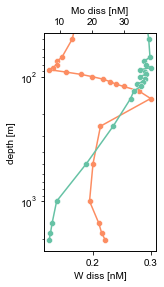

In [8]:
# load the data for the W and Mo measuremnts
geochem_data = pd.read_csv("../data/W_vs_Mo_BlackSea/BlackSea_BS32_WvsMoAbundances.csv")

yvar = "depth [m]"
xvar = "W diss [nM]"

plt.figure(figsize=(2,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"

sns.scatterplot(x=xvar,data=geochem_data,y=yvar,color=cmap[1])
#sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[1])

plt.plot(geochem_data.sort_values(yvar)[xvar],geochem_data.sort_values(yvar)[yvar],color=cmap[1])


ax2 = plt.twiny()
xvar = "Mo diss [nM]"
sns.scatterplot(x=xvar,data=geochem_data,y=yvar,color=cmap[0])
#sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[1])

plt.plot(geochem_data.sort_values(yvar)[xvar],geochem_data.sort_values(yvar)[yvar],color=cmap[0])
#plt.ylim([0 1])
#plt.ylim([8,2500])
plt.ylim([45,2500])


plt.gca().invert_yaxis()
plt.yscale("log")
plt.ylabel("depth (m)")
plt.savefig("../figures/Dissolved.WvsMo.BlackSeaWaterColumn.23Feb2023.svg")

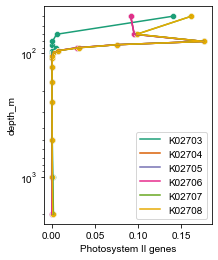

In [265]:
cmap = sns.color_palette("Dark2")

plt.figure(figsize=(3,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
#gene = "W_KOs"
genes = ['K02703',"K02704","K02705","K02706","K02707","K02708"]
for i in range(len(genes)):
    gene = genes[i]
    sns.scatterplot(x=gene,data=df,y="depth_m",color=cmap[i])
    #sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[1])
    plt.plot(df.sort_values("depth_m")[gene],df.sort_values("depth_m")["depth_m"],color=cmap[i])

#plt.xlabel("relative copy of number of \n pyanopterin gene families")
plt.legend(genes)

#plt.ylabel("$aor$ abundance")
#plt.xlabel("depth (m)")

#ax2 = plt.twinx()
#feature = "O2_mmolperkg"
#feature = "H2S mM"
#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)
#sns.scatterplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)

#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)

plt.gca().invert_yaxis()
plt.xlabel("Photosystem II genes")
plt.yscale("log")

#plt.ylabel("dissolved oxygen (mmol / kg)")
#plt.label("depth (m)")
#plt.savefig("pterinEnzymes.BlackSea.MoVsW.hplot.04Feb2023.svg")

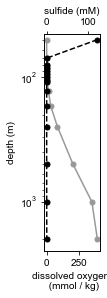

In [9]:
cmap1 = sns.color_palette("Set1")
plt.figure(figsize=(1,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
#gene = "K03738"

feature = "H2S mM"

#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap1[4])
#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[4])
#plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[4])
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[8],marker="o",markersize=5)


#sns.scatterplot(y="K11389",data=df,x="depth_m",color="gray")
#sns.lineplot(y="K11389",data=df,x="depth_m",color="gray")

plt.xlabel("dissolved oxygen \n (mmol / kg)")
plt.ylabel("depth (m)")

ax2 = plt.twiny()
feature = "O2_mmolperkg"
#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)
#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap1[1],ax=ax2)
#plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[1])
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color="k",marker="o",linestyle="dashed",markersize=5)


#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)

#plt.ylim([8,2500])
plt.ylim([45,2500])

plt.yscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
plt.xlabel("sulfide (mM)")
plt.ylabel("depth (m)")
plt.gca().invert_yaxis()
#plt.savefig("oxygen_sulfur.03Feb2023.svg")
#plt.savefig("oxygen_sulfur.05Feb2023.svg")
plt.savefig("../figures/black_Sea.oxygen_sulfur.23Feb2023.svg")

In [206]:
list(md)
f = ['nitrate',"Nitrite","phosphate"]

In [250]:
df["nitrate (mM)"]= df["nitrate"].apply(lambda x: x.replace("under detection limit","0 mM"))
df["nitrate (mM)"] = df["nitrate (mM)"].apply(lambda x: np.float(x.split(" ")[0]))

df["nitrite (mM)"]= df["Nitrite"].apply(lambda x: x.replace("under detection limit","0 mM"))
df["nitrite (mM)"] = df["nitrite (mM)"].apply(lambda x: np.float(x.split(" ")[0]))

df["phosphate (mM)"]= df["phosphate"].apply(lambda x: x.replace("under detection limit","0 mM"))
df["phosphate (mM)"] = df["phosphate (mM)"].apply(lambda x: np.float(x.split(" ")[0]))

df["ammonia (mM)"]= df["ammonium"].apply(lambda x: x.replace("under detection limit","0 mM"))
df["ammonia (mM)"] = df["ammonia (mM)"].apply(lambda x: np.float(x.split(" ")[0]))

df["temperature (C)"] = df["Temp"].apply(lambda x: np.float(x.split(" ")[0]))
df["salinity (PSU)"] = df["Salinity"].apply(lambda x: np.float(x.split(" ")[0]))


<ipython-input-250-8c6674bba61b>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["nitrate (mM)"] = df["nitrate (mM)"].apply(lambda x: np.float(x.split(" ")[0]))
<ipython-input-250-8c6674bba61b>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["nitrite (mM)"] = df["nitrite (mM)"].apply(lambda x: np.float(x.split(" ")[0]))
<ipython-i

In [233]:
#df

In [219]:
#df

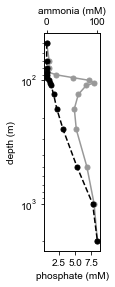

In [298]:
cmap1 = sns.color_palette("Set1")
plt.figure(figsize=(1,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
#gene = "K03738"

feature = "phosphate (mM)"
#feature = "nitrite (mM)"

#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap1[7])
#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[4])
#plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[7])
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[8],marker="o",markersize=5)


#sns.scatterplot(y="K11389",data=df,x="depth_m",color="gray")
#sns.lineplot(y="K11389",data=df,x="depth_m",color="gray")

plt.xlabel(feature)
plt.ylabel("depth (m)")

ax2 = plt.twiny()
#feature = "nitrate (mM)"
feature = "ammonia (mM)"

#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)
#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap1[3],ax=ax2)
#plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[3])
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color="k",marker="o", linestyle='dashed',markersize=5)


#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)


plt.yscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
plt.xlabel(feature)
plt.ylabel("depth (m)")
plt.gca().invert_yaxis()
#plt.legend(['p','a'])

#plt.savefig("oxygen_sulfur.03Feb2023.svg")
plt.savefig("phosphate_ammonia.05Feb2023.svg")

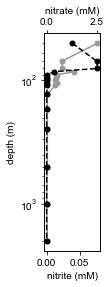

In [299]:
cmap1 = sns.color_palette("Set1")
plt.figure(figsize=(1,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
#gene = "K03738"

#feature = "phosphate (mM)"
feature = "nitrite (mM)"

#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap1[8])
#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[4])
#plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[8])
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[8],marker="o",markersize=5)

#sns.scatterplot(y="K11389",data=df,x="depth_m",color="gray")
#sns.lineplot(y="K11389",data=df,x="depth_m",color="gray")

plt.xlabel(feature)
plt.ylabel("depth (m)")

ax2 = plt.twiny()
feature = "nitrate (mM)"
#feature = "ammonia (mM)"

#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)
#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap1[6],ax=ax2)
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color="k",marker="o", linestyle='dashed',markersize=5)


#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)


plt.yscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
plt.xlabel(feature)
plt.ylabel("depth (m)")
plt.gca().invert_yaxis()

plt.savefig("nitrate_nitrite.05Feb2023.svg")

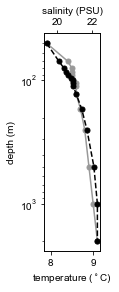

In [300]:
cmap1 = sns.color_palette("Set1")
plt.figure(figsize=(1,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
#gene = "K03738"

#feature = "phosphate (mM)"
#feature = "nitrite (mM)"
feature = "temperature (C)"

#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap1[0])
#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[4])
#plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[0])
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[8],marker="o",markersize=5)


#sns.scatterplot(y="K11389",data=df,x="depth_m",color="gray")
#sns.lineplot(y="K11389",data=df,x="depth_m",color="gray")

plt.xlabel("temperature ($^\circ$C)")
plt.ylabel("depth (m)")

ax2 = plt.twiny()
#feature = "nitrate (mM)"
#feature = "ammonia (mM)"
feature = "salinity (PSU)"


#sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)
#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap1[2],ax=ax2)
#plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap1[2])
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color="k",marker="o", linestyle='dashed',markersize=5)


#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)


plt.yscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
plt.xlabel(feature)
plt.ylabel("depth (m)")
plt.gca().invert_yaxis()

plt.savefig("temp_salinity.05Feb2023.svg")

In [113]:
cmap = sns.color_palette()
cmap

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [129]:
google_sheet = 'https://docs.google.com/spreadsheets/d/1WjqoaGkUAWqmktBSK3kuq_SeBeLk-PwOJqBHa5Cvizk/export?gid=0&format=csv'
mwpterins = pd.read_csv(google_sheet)
mwpterins

w_ko = mwpterins[mwpterins["Pterin"].isin(['W'])]['KO (pterin domain)'].dropna().unique().tolist()
mo_ko = mwpterins[mwpterins["Pterin"].isin(['Mo'])]['KO (pterin domain)'].dropna().unique().tolist()

mo_genes = [x for x in mo_ko if x in list(df)]
w_genes = [x for x in w_ko if x in list(df)]


In [132]:
mo_genes

['K05301',
 'K02567',
 'K07303',
 'K08356',
 'K18030',
 'K00370',
 'K07306',
 'K08352',
 'K03520',
 'K21307']

Text(0.5, 0, 'depth (m)')

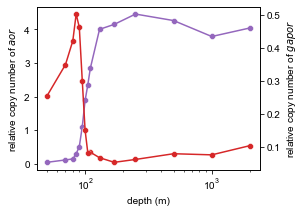

In [138]:
plt.figure(figsize=(4,3))

#gene = "K05772"
#gene = "K05773"
#feature = "K06857"
feature = "K03738"
sns.scatterplot(y=feature,data=df,x="depth_m",color=cmap[4])
sns.lineplot(y=feature,data=df,x="depth_m",color=cmap[4])

#sns.scatterplot(y="K11389",data=df,x="depth_m",color="gray")
#sns.lineplot(y="K11389",data=df,x="depth_m",color="gray")

#plt.ylabel("$aor$ abundance")
plt.xlabel("depth (m)")
plt.ylabel("relative copy number of $aor$")

ax2 = plt.twinx()

#feature = "O2_mmolperkg"
#feature = "H2S mM"

#feature = "K06857"
#feature = "K03738"
feature = "K11389"
feature = "K05301"
feature = "K00370"
feature = "K08352"
feature = "K03520"
sns.lineplot(y=feature,data=df,x="depth_m",color=cmap[3],ax=ax2)
sns.scatterplot(y=feature,data=df,x="depth_m",color=cmap[3],ax=ax2)

#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)


plt.xscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
#plt.ylabel("hydrogen sulfide (mM)")
plt.ylabel("relative copy number of $gapor$")
plt.xlabel("depth (m)")
#plt.savefig("aor_tupC.03Feb2023.svg")

Text(0.5, 0, 'depth (m)')

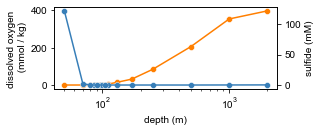

In [158]:
plt.figure(figsize=(4,1.5))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"
#gene = "K03738"

feature = "H2S mM"


sns.scatterplot(y=feature,data=df,x="depth_m",color=cmap1[4])
sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[4])

#sns.scatterplot(y="K11389",data=df,x="depth_m",color="gray")
#sns.lineplot(y="K11389",data=df,x="depth_m",color="gray")

plt.ylabel("dissolved oxygen \n (mmol / kg)")
plt.xlabel("depth (m)")

ax2 = plt.twinx()
feature = "O2_mmolperkg"
sns.lineplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)
sns.scatterplot(y=feature,data=df,x="depth_m",color=cmap1[1],ax=ax2)

#sns.lineplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)
#sns.scatterplot(y="O2_mmolperkg",data=df,x="depth_m",color="r",ax=ax2)


plt.xscale("log")
#plt.ylabel("dissolved oxygen (mmol / kg)")
plt.ylabel("sulfide (mM)")
plt.xlabel("depth (m)")
#plt.savefig("oxygen_sulfur.03Feb2023.svg")

In [163]:
cmap_tup = sns.color_palette("Purples_r")
cmap_tup

[(0.3405767012687428, 0.1742560553633218, 0.5709342560553633),
 (0.440722798923491, 0.36772010765090346, 0.6653902345251825),
 (0.5513264129181085, 0.537916186082276, 0.7524490580545944),
 (0.6878892733564014, 0.6835832372164552, 0.8298346789696271),
 (0.8207612456747405, 0.8218992695117262, 0.9044982698961938),
 (0.9265974625144175, 0.919769319492503, 0.9557093425605536)]

<Figure size 400x300 with 0 Axes>

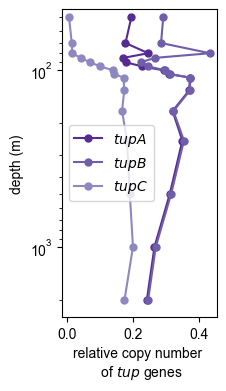

In [31]:
cmap_tup = sns.color_palette("Purples_r")
plt.figure(figsize=(4,3))
plt.figure(figsize=(2,4))

#gene = "K05772"
#gene = "K05773"
#feature = "K06857"
#feature = "K03738"
feature = "K05772"

#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap_tup[0])
#sns.lineplot(x=feature,data=df,y="depth_m",color=cmap_tup[0])
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap_tup[0],marker="o",markersize=5)


feature = "K05773"
#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap_tup[1])
#sns.lineplot(x=feature,data=df,y="depth_m",color=cmap_tup[1])
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap_tup[1],marker="o",markersize=5)

feature = "K06857"
#normalized = df[feature] / df[feature].min()
#sns.scatterplot(x=feature,data=df,y="depth_m",color=cmap_tup[2])
#sns.lineplot(x=feature,data=df,y="depth_m",color=cmap_tup[2])
plt.plot(df.sort_values("depth_m")[feature],df.sort_values("depth_m")["depth_m"],color=cmap_tup[2],marker="o",markersize=5)


#sns.scatterplot(y="K11389",data=df,x="depth_m",color="gray")
#sns.lineplot(y="K11389",data=df,x="depth_m",color="gray")

#plt.ylabel("$aor$ abundance")
plt.xlabel("relative copy number \n of $tup$ genes")
plt.yscale("log")

plt.legend(["$tupA$","$tupB$","$tupC$"])
#plt.savefig("tungstate_transporters.svg")

plt.ylim([45,2500])


plt.gca().invert_yaxis()
plt.yscale("log")
plt.ylabel("depth (m)")
plt.savefig("tupGenes.depthProfile.blackSea.svg")


In [168]:

yvar = "depth [m]"
xvar = "W diss [nM]"

plt.figure(figsize=(2,4))

#gene = "K05772"
#gene = "K05773"
#gene = "K06857"

sns.scatterplot(x=xvar,data=geochem_data,y=yvar,color=cmap[1])
#sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[1])

plt.plot(geochem_data.sort_values(yvar)[xvar],geochem_data.sort_values(yvar)[yvar],color=cmap[1])


ax2 = plt.twiny()
xvar = "Mo diss [nM]"
sns.scatterplot(x=xvar,data=geochem_data,y=yvar,color=cmap[0])
#sns.lineplot(x=gene,data=df,y="depth_m",color=cmap[1])

plt.plot(geochem_data.sort_values(yvar)[xvar],geochem_data.sort_values(yvar)[yvar],color=cmap[0])
#plt.ylim([0 1])
#plt.ylim([8,2500])
plt.ylim([45,2500])


plt.gca().invert_yaxis()
plt.yscale("log")
plt.ylabel("depth (m)")

SRR12347140    29.478728
SRR12347133    29.000182
SRR12347143    30.772706
SRR12347136    17.021688
SRR12347135    23.653804
SRR12347132    29.328074
SRR12347138     6.969939
SRR12347134    24.263095
SRR12347146     1.000000
SRR12347139     2.679709
SRR12347137    11.802158
SRR12347145     2.420685
SRR12347142    32.201805
SRR12347144    28.239121
SRR12347141    33.819477
Name: K06857, dtype: float64

In [ ]:
import geopandas as goepd
#import descartes
from shapely.geometry import Polygon, Point


In [78]:
blacksea = goepd.read_file("/Users/joshuagoldford/Downloads/black-seageojson.shp")

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: dlopen(/Users/joshuagoldford/opt/miniconda3/envs/informatics/lib/python3.8/site-packages/fiona/_env.cpython-38-darwin.so, 0x0002): Library not loaded: '@rpath/libtiff.5.dylib'
  Referenced from: '/Users/joshuagoldford/opt/miniconda3/envs/informatics/lib/libpoppler.126.0.0.dylib'
  Reason: tried: '/Users/joshuagoldford/opt/miniconda3/envs/informatics/lib/libtiff.5.dylib' (no such file), '/Users/joshuagoldford/opt/miniconda3/envs/informatics/lib/libtiff.5.dylib' (no such file), '/Users/joshuagoldford/opt/miniconda3/envs/informatics/lib/python3.8/site-packages/fiona/../../../libtiff.5.dylib' (no such file), '/Users/joshuagoldford/opt/miniconda3/envs/informatics/lib/python3.8/site-packages/fiona/../../../libtiff.5.dylib' (no such file), '/Users/joshuagoldford/opt/miniconda3/envs/informatics/lib/libtiff.5.dylib' (no such file), '/Users/joshuagoldford/opt/miniconda3/envs/informatics/lib/libtiff.5.dylib' (no such file), '/Users/joshuagoldford/opt/miniconda3/envs/informatics/bin/../lib/libtiff.5.dylib' (no such file), '/Users/joshuagoldford/opt/miniconda3/envs/informatics/lib/libtiff.5.dylib' (no such file), '/Users/joshuagoldford/opt/miniconda3/envs/informatics/lib/libtiff.5.dylib' (no such file), '/Users/joshuagoldford/opt/miniconda3/envs/informatics/bin/../lib/libtiff.5.dylib' (no such file), '/usr/local/lib/libtiff.5.dylib' (no such file), '/usr/lib/libtiff.5.dylib' (no such file)
Importing pyogrio resulted in: No module named 'pyogrio'

In [ ]:
blacksea